In [44]:
import pandas as pd

def remove_value_outliers(df: pd.DataFrame):
  # extracts q1, q3, and iqr from the dataframe and makes a copy of the df
  q1 = df['value'].quantile(0.25)
  print(f'\t\t\t\tq1: {q1}')
  q3 = df['value'].quantile(0.75)
  print(f'\t\t\t\tq3: {q3}')
  iqr = q3 - q1
  print(f'\t\t\t\tiqr: {iqr}')
  dfc = df.copy()

  ## upper outliers "squashing"

  # finds the upper threshold value
  upper_threshold_value = q3 + (1.5 * iqr)
  print(f'\t\t\t\tupper_threshold_value: {upper_threshold_value}')

  dfc_superseded_q3 = dfc[dfc['value'] > upper_threshold_value].copy()
  dfc_superseded_q3['value'] = upper_threshold_value
  dfc = pd.concat([
    dfc[~(dfc['value'] > upper_threshold_value)], 
    dfc_superseded_q3
  ])

  ## lower outliers "squashing"

  # finds the lower threshold value
  lower_threshold_value = q1 - (1.5 * iqr)
  print(f'\t\t\t\tlower_threshold_value: {lower_threshold_value}')
  
  dfc_preceded_q1 = dfc[dfc['value'] < lower_threshold_value].copy()
  dfc_preceded_q1['value'] = lower_threshold_value
  dfc = pd.concat([
      dfc[~(dfc['value'] < lower_threshold_value)], 
      dfc_preceded_q1
  ])
  
  # sort by column 'time'
  dfc = dfc.sort_values(by=['time'])

  return dfc

In [1]:
import pandas as pd

m_df = pd.read_csv('m_df(12-05-23 to 12-13-23).csv', index_col=0, low_memory=False)

m_df

,time,value,data_label,file_origin,sensor_label,sensor_number,date_collected
0,0.10,27.0,breaker,breaker10_12-11-23.xlsx,A,0,12-11-23
1,0.17,27.0,breaker,breaker10_12-11-23.xlsx,A,0,12-11-23
2,0.25,27.0,breaker,breaker10_12-11-23.xlsx,A,0,12-11-23
3,0.32,27.0,breaker,breaker10_12-11-23.xlsx,A,0,12-11-23
4,0.40,27.0,breaker,breaker10_12-11-23.xlsx,A,0,12-11-23
...,...,...,...,...,...,...,...
1597,119.76,NaN,turning,turning9_12-12-23.xlsx,D,T,12-12-23
1598,119.84,NaN,turning,turning9_12-12-23.xlsx,D,T,12-12-23
1599,119.92,NaN,turning,turning9_12-12-23.xlsx,D,T,12-12-23
1600,120.00,NaN,turning,turning9_12-12-23.xlsx,D,T,12-12-23


date: 12-11-23
sensor_label: A
sensor_number: 0


<Axes: xlabel='data_label', ylabel='value'>

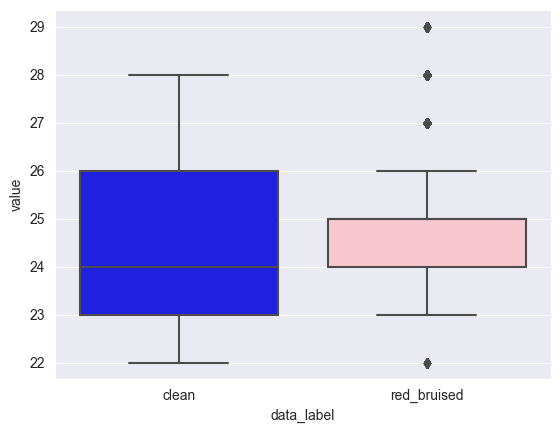

In [56]:
import seaborn as sns

# dates_available = m_df['date_collected'].unique()
# condition = m_df['date_collected'] == dates_available[0]
condition = m_df['date_collected'] == "12-13-23"
print(f'date: {dates_available[0]}')
filtered_df = m_df[condition]

s_label = 'A'
print(f'sensor_label: {s_label}')
condition = filtered_df['sensor_label'] == s_label
filtered_df = filtered_df[condition]

s_number = '0'
print(f'sensor_number: {s_number}')
condition = filtered_df['sensor_number'] == s_number
filtered_df = filtered_df[condition]


colors = {'breaker': 'yellow', 'green': 'green', 'red': 'red', 'turning': 'orange', 'spoiled': 'brown', 'clean': 'blue', 'aeration': 'purple', 'red_bruised': 'pink', 'bruised_green': 'olive', 'bruised_turning': '#6A4900'}
sns.boxplot(x='data_label', y='value', data=filtered_df, palette=colors)

In [45]:
cleaned_m_df = pd.DataFrame()

# day + classification outlier normalization
for date_collected in m_df['date_collected'].unique():
  condition_date_collected = m_df['date_collected'] == date_collected
  filtered_df_date_collected = m_df[condition_date_collected]
  print(f'({date_collected}): {len(filtered_df_date_collected.index)} rows')
  
  for data_label in filtered_df_date_collected['data_label'].unique():
    condition_data_label = filtered_df_date_collected['data_label'] == data_label
    filtered_df_data_label = filtered_df_date_collected[condition_data_label]
    print(f'\t({data_label}): {len(filtered_df_data_label.index)} rows')
    
    for sensor_label in filtered_df_data_label['sensor_label'].unique():
      condition_sensor_label = filtered_df_data_label['sensor_label'] == sensor_label
      filtered_df_data_label_sensor_label = filtered_df_data_label[condition_sensor_label]
      print(f'\t\t({sensor_label}): {len(filtered_df_data_label_sensor_label.index)} rows')
      
      for sensor_number in filtered_df_data_label_sensor_label['sensor_number'].unique():        
        condition_sensor_number = filtered_df_data_label_sensor_label['sensor_number'] == sensor_number
        filtered_df_data_label_sensor_label_sensor_number = filtered_df_data_label_sensor_label[condition_sensor_number]
        print(f'\t\t\t({sensor_number}): {len(filtered_df_data_label_sensor_label_sensor_number.index)} rows...')
        
        if sensor_number == 'T':
          cleaned_m_df = pd.concat([cleaned_m_df, filtered_df_data_label_sensor_label_sensor_number])
          print('\t\t\t\tdone')
          continue
        
        filtered_df_data_label_sensor_label_sensor_number = remove_value_outliers(filtered_df_data_label_sensor_label_sensor_number)
        cleaned_m_df = pd.concat([cleaned_m_df, filtered_df_data_label_sensor_label_sensor_number])
        print('\t\t\t\tdone')
              
  print('\n')

cleaned_m_df

(12-11-23): 924800 rows
	(breaker): 400992 rows
		(A): 100248 rows
			(0): 25062 rows...
			q1: 23.0
			q3: 28.0
			iqr: 5.0
			upper_threshold_value: 35.5
			lower_threshold_value: 15.5
done
			(1): 25062 rows...
			q1: 182.0
			q3: 186.0
			iqr: 4.0
			upper_threshold_value: 192.0
			lower_threshold_value: 176.0
done
			(2): 25062 rows...
			q1: 62.0
			q3: 70.0
			iqr: 8.0
			upper_threshold_value: 82.0
			lower_threshold_value: 50.0
done
			(T): 25062 rows...
done
		(B): 100248 rows
			(0): 25062 rows...
			q1: 82.0
			q3: 88.0
			iqr: 6.0
			upper_threshold_value: 97.0
			lower_threshold_value: 73.0
done
			(1): 25062 rows...
			q1: 131.0
			q3: 137.0
			iqr: 6.0
			upper_threshold_value: 146.0
			lower_threshold_value: 122.0
done
			(2): 25062 rows...
			q1: 78.0
			q3: 86.0
			iqr: 8.0
			upper_threshold_value: 98.0
			lower_threshold_value: 66.0
done
			(T): 25062 rows...
done
		(C): 100248 rows
			(0): 25062 rows...
			q1: 14.0
			q3: 18.0
			iqr: 4.0
			upper_threshold_value:

,time,value,data_label,file_origin,sensor_label,sensor_number,date_collected
4,0.03,27.0,breaker,breaker12_12-11-23.xlsx,A,0,12-11-23
0,0.03,23.0,breaker,breaker6_12-11-23.xlsx,A,0,12-11-23
0,0.03,28.0,breaker,breaker11_12-11-23.xlsx,A,0,12-11-23
0,0.03,23.0,breaker,breaker3_12-11-23.xlsx,A,0,12-11-23
0,0.03,23.0,breaker,breaker7_12-11-23.xlsx,A,0,12-11-23
...,...,...,...,...,...,...,...
1611,120.84,NaN,red_bruised,orange4daybruised8_12-13-23.xlsx,D,T,12-13-23
1612,120.92,NaN,red_bruised,orange4daybruised8_12-13-23.xlsx,D,T,12-13-23
1613,121.00,NaN,red_bruised,orange4daybruised8_12-13-23.xlsx,D,T,12-13-23
1614,121.09,NaN,red_bruised,orange4daybruised8_12-13-23.xlsx,D,T,12-13-23


date: 12-11-23
sensor_label: A
sensor_number: 1


<Axes: xlabel='data_label', ylabel='value'>

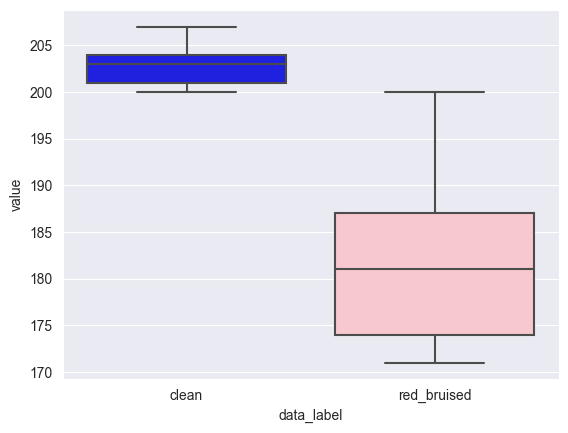

In [54]:
import seaborn as sns

# dates_available = cleaned_m_df['date_collected'].unique()
# condition = cleaned_m_df['date_collected'] == dates_available[0]
condition = cleaned_m_df['date_collected'] == '12-13-23'
print(f'date: {dates_available[0]}')
filtered_df = cleaned_m_df[condition]

s_label = 'A'
print(f'sensor_label: {s_label}')
condition = filtered_df['sensor_label'] == s_label
filtered_df = filtered_df[condition]

s_number = '1'
print(f'sensor_number: {s_number}')
condition = filtered_df['sensor_number'] == s_number
filtered_df = filtered_df[condition]


colors = {'breaker': 'yellow', 'green': 'green', 'red': 'red', 'turning': 'orange', 'spoiled': 'brown', 'clean': 'blue', 'aeration': 'purple', 'red_bruised': 'pink', 'bruised_green': 'olive', 'bruised_turning': '#6A4900'}
sns.boxplot(x='data_label', y='value', data=filtered_df, palette=colors)